In [56]:
from xbbg import blp
import pdblp
import workdays
import datetime
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 70)
# https://data.bloomberglp.com/labs/sites/2/2013/12/blpapi-developers-guide-1.38.pdf
# https://data.bloomberglp.com/professional/sites/10/2017/03/BLPAPI-Core-Developer-Guide.pdf

def Plot(title="",c="" ,l="",axhline="",m="", ymin=None, ymax=None):
    fig, ax = plt.subplots(figsize=(6.5, 2))
    ax.plot(df["Date"], df[c], label=l, marker=m)
    ax.set_title(title, fontsize=10)
    if axhline != "":
        ax.axhline(y=axhline, color='gray', linestyle='--', linewidth=0.5)
    if l != "":
        ax.legend(loc='best')
    if ymin is not None and ymax is not None:
        ax.set_ylim(ymin, ymax)
    plt.tight_layout()
    plt.show()
    
def Plot2(title,c1,c2,l1="",l2="",m1="",m2="",axhline="",color2='tab:orange'): #Two-axis graph  
    fig, ax = plt.subplots(figsize=(6.5, 2))
    l1 = l1 or c1  # l1 = c1 if l1 == "" else l1
    l2 = l2 or c2
    ax.plot(df["Date"], df[c1], marker=m1, label=l1)
    ax.plot(df["Date"], df[c2], marker=m2, label=l2, color=color2)
    if axhline != "":
        ax.axhline(y=axhline, color='gray', linestyle='--', linewidth=0.5)
    ax.set_title(title, fontsize=10)
    ax.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
def PlotTW(title,c1,c2,l1="",l2=""): #Two-axis graph
    fig, ax = plt.subplots(figsize=(10, 2.3))
    l1 = l1 or c1  # l1 = c1 if l1 == "" else l1
    l2 = l2 or c2
    
    line1, = ax.plot(df["Date"], df[c1], label=l1)  # line1オブジェクトを取得
    ax.set_ylabel(l1)

    ax2 = ax.twinx()
    line2, = ax2.plot(df["Date"], df[c2], label=l2, color='lightsteelblue')  # line2オブジェクトを取得
    ax2.set_ylabel(l2)
    
    ax.set_title(title, fontsize=10)
    ax.legend(handles=[line1, line2], labels=[l1, l2], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

    plt.tight_layout()
    plt.show()

In [59]:
L0 = ['ES','NQ','RTY','VG','TP','JGS','NZ','IFB','FFD','XU','TWT']
# L0 = ['ES','NQ','RTY']
L1 = ['SPY US','QQQ US','AAPL US','1306 JP']
L = L0 + [x.split()[0] for x in L1] 

T = [x + 'A Index' for x in L0 ] + [x + ' Equity' for x in L1 ]
df_BDP = blp.bdp(tickers=T, flds=['name','currency','exch_code','undl_spot_ticker','beta_override_rel_index']).loc[T,:]
display(df_BDP)


T = [x + '1 Index' for x in L0 ] + [x + ' Equity' for x in L1 ]
d_from = workdays.workday(datetime.datetime.today(), days=-260*2).strftime("%Y%m%d")
d_to = workdays.workday(datetime.datetime.today(), days=-1).strftime("%Y%m%d")
df = blp.bdh(T, ["px_last","px_volume"], d_from, d_to, Calendar="5D", Fill="P").reset_index()
df = df[[df.columns[0][0]]+T]
df.columns = ["Date"] + [ l + x for l in L for x in ["_last","_volume"]]
df["Date"] = pd.to_datetime(df["Date"])
df.head()


,name,currency,exch_code,undl_spot_ticker,beta_override_rel_index
ESA Index,S&P500 EMINI FUT Dec24,USD,CME,SPX,INDU Index
NQA Index,NASDAQ 100 E-MINI Dec24,USD,CME,NDX,INDU Index
RTYA Index,E-Mini Russ 2000 Dec24,USD,CME,RTY,INDU Index
VGA Index,EURO STOXX 50 Dec24,EUR,EUX,SX5E,INDU Index
TPA Index,TOPIX INDX FUTR Dec24,JPY,OSE,TPX,INDU Index
JGSA Index,IFSC NIFTY 50 FUT Nov24,USD,NGC,NIFTY,INDU Index
NZA Index,Nifty 50 Nov24,INR,NSE,NIFTY,INDU Index
IFBA Index,CSI 300 IDX FUTUR Dec24,CNY,CFF,SHSN300,INDU Index
FFDA Index,CSI500 IDX Future Dec24,CNY,CFF,SH000905,INDU Index
XUA Index,FTSE CHINA A50 Nov24,USD,SGX,XIN9I,INDU Index


,Date,ES_last,ES_volume,NQ_last,NQ_volume,RTY_last,RTY_volume,VG_last,VG_volume,TP_last,TP_volume,JGS_last,JGS_volume,NZ_last,NZ_volume,IFB_last,IFB_volume,FFD_last,FFD_volume,XU_last,XU_volume,TWT_last,TWT_volume,SPY_last,SPY_volume,QQQ_last,QQQ_volume,AAPL_last,AAPL_volume,1306_last,1306_volume
0,2022-11-21,4307.43,1178421.0,12774.83,477970.0,1993.71,124042.0,3955.48,577420.0,1887.5,37870.0,20900.64,5430.0,20816.37,126219.0,3689.73,76464.0,5511.30,60840.0,11898.4,269295.0,1238.60,43068.0,394.59,51243189.0,281.89,40083527.0,148.01,58724070.0,2056.5,963160.0
1,2022-11-22,4364.29,1161999.0,12958.38,531087.0,2016.00,136678.0,3976.72,674310.0,1908.6,58677.0,20959.21,5947.0,20917.97,114974.0,3684.06,84648.0,5438.66,69925.0,12018.1,257801.0,1242.01,47872.0,399.90,60429025.0,285.95,41873444.0,150.18,51804132.0,2080.0,1465430.0
2,2022-11-23,4389.05,1281153.0,13077.71,474645.0,2018.81,156991.0,3994.92,692082.0,1908.6,58677.0,20983.91,5329.0,20924.55,132279.0,3697.16,79987.0,5443.64,68440.0,11994.5,314964.0,1252.73,59219.0,402.42,68261628.0,288.82,46389967.0,151.07,58301395.0,2080.0,1465430.0
3,2022-11-24,4389.05,1281153.0,13077.71,474645.0,2018.81,156991.0,4008.07,546710.0,1930.6,78621.0,21328.38,5329.0,21185.36,190026.0,3680.15,70279.0,5447.54,55072.0,11917.0,412577.0,1267.09,76175.0,402.42,68261628.0,288.82,46389967.0,151.07,58301395.0,2103.0,1653440.0
4,2022-11-25,4388.51,608795.0,12989.52,252366.0,2022.92,79453.0,4006.05,623996.0,1932.0,42513.0,21355.84,5493.0,21208.05,125828.0,3701.07,77374.0,5422.33,55320.0,12010.2,693347.0,1262.71,75379.0,402.33,30545434.0,286.92,15498797.0,148.11,35195860.0,2104.5,1165630.0


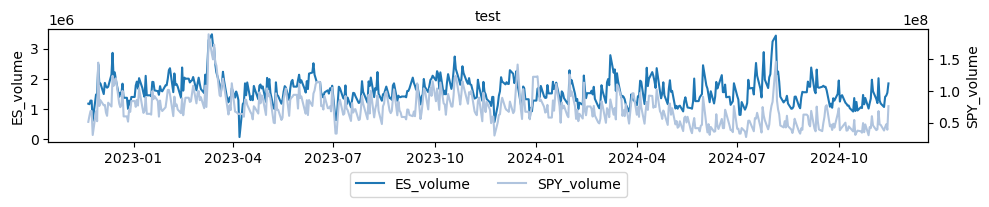

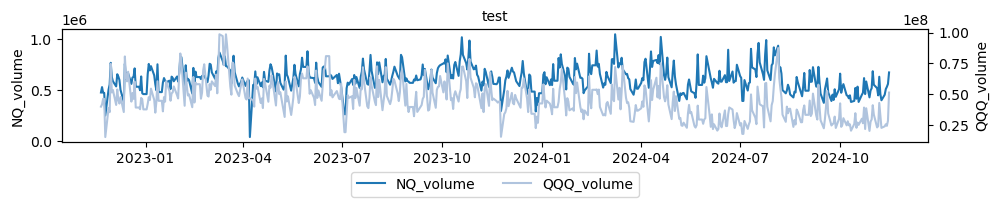

In [57]:
PlotTW('test','ES_volume','SPY_volume')
PlotTW('test','NQ_volume','QQQ_volume')

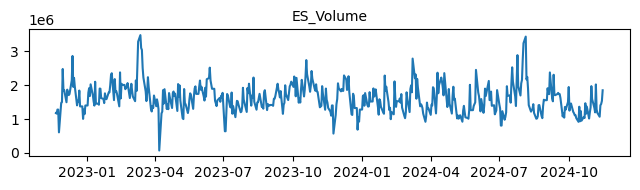

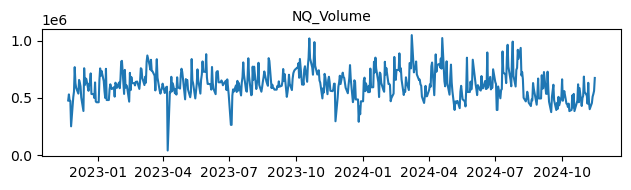

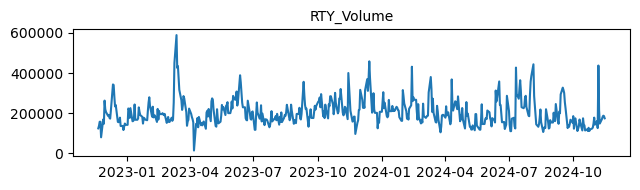

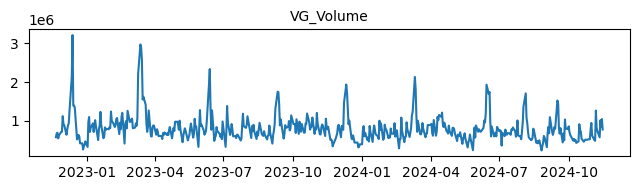

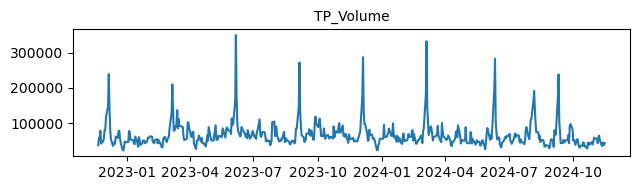

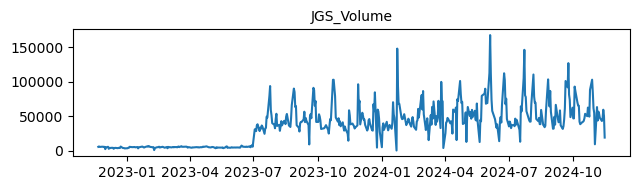

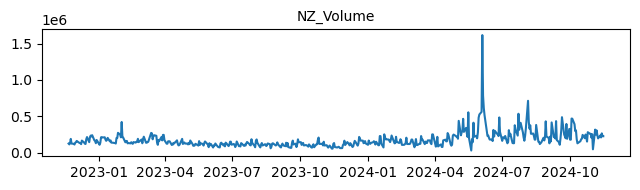

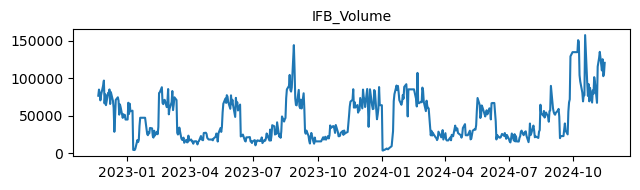

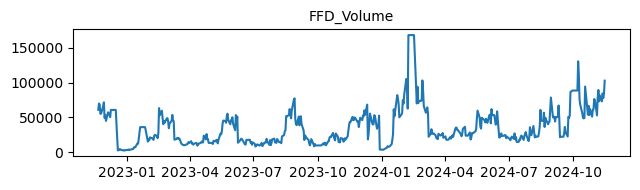

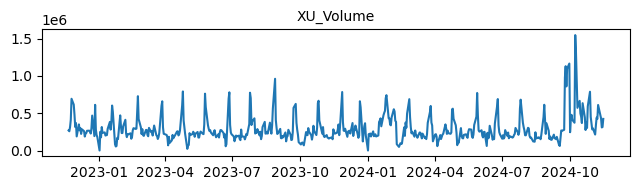

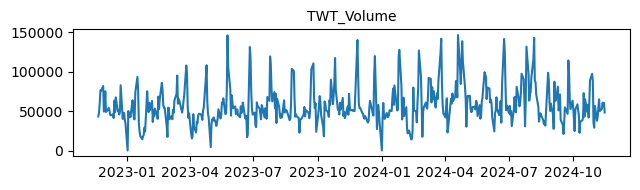

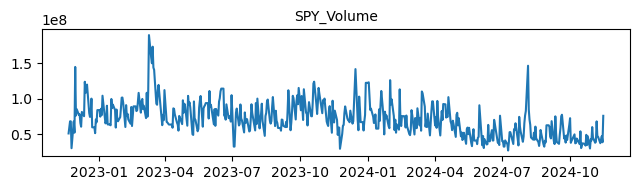

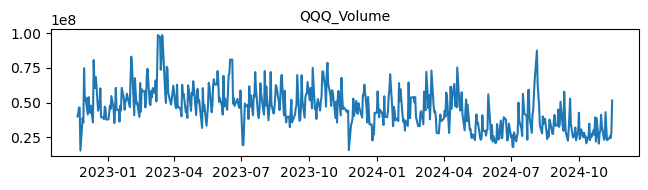

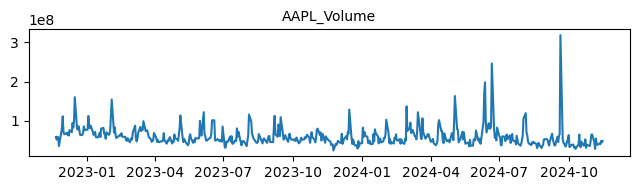

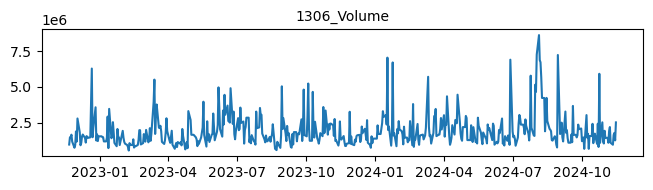

In [60]:
for i in L:
    Plot(i+"_Volume",i+"_volume")